# Electrostatic Ion acoustic mode

In [30]:
import numpy as np
import scipy.optimize
from py_vlasov.util import zp, kzkp, list_to_complex, real_imag, nullspace
from py_vlasov.wrapper import disp_det, input_gen
from py_vlasov.transport_ratios import transport_ratios
from py_vlasov.follow_parameter import follow_k
from py_vlasov.dispersion_tensor import f_d

import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['xtick.minor.size'] = 3.5
mpl.rcParams['ytick.minor.size'] = 3.5
mpl.rcParams['xtick.major.width'] = 1.1
mpl.rcParams['ytick.major.width'] = 1.1
mpl.rcParams['xtick.minor.width'] = .8
mpl.rcParams['ytick.minor.width'] = .8
#xtick.major.size     : 3.5      # major tick size in points
#xtick.minor.size     : 2      # minor tick size in points
#xtick.major.width    : 0.8    # major tick width in points
#xtick.minor.width    : 0.6    # minor tick width in points
%matplotlib inline

In [7]:
def ia_freq_fn(k, te_ti):
    return k * np.sqrt(0.5*(te_ti + 3))

In [93]:
k = 0.1
kz = k
kp = 0        
betap = 10.
te_ti = 100.
t_list=[1., te_ti, te_ti]
a_list=[1., 1., 1.]
n_list=[1., .5, .5] 
q_list=[1., -1., -1.]
m_list=[1., 1/1836, 1/1836]
v_list=[0, 0, 0]
aol = 1/5000.
n = 6 # number of Bessel fn to keep
method = 'numpy'
pol = 's' # electrostatic
param = [kz, kp, betap, t_list, a_list, n_list, q_list,
         m_list, v_list, n, method, aol]

f = lambda wrel: real_imag(disp_det(
    list_to_complex(wrel), kz, kp, betap, t_list, a_list, n_list,
    q_list, m_list, v_list, method = method, aol=aol, pol = pol))
guess = ia_freq_fn(kz, te_ti) * (1 - .1j)
print('Guess ion acoustic wave freq = {0:.2g}'.format(guess))
freq = scipy.optimize.fsolve(f, real_imag(guess))
print('found w = ', freq)

Guess ion acoustic wave freq = 0.72-0.072j
found w =  [ 0.71766701 -0.01033099]


In [87]:
target_k = np.sqrt(2)
freq = follow_k(guess, target_k, param, pol = pol,
                log_incrmt = 0.02, incrmt_method = 'log')

In [88]:
freq_arr = np.array(freq[-1])
print(freq_arr[::5])

[ 0.71766701-0.01033099j  0.79223248-0.01140438j  0.87454529-0.01258929j
  0.96541039-0.01389732j  1.06571636-0.01534125j  1.17644409-0.0169352j
  1.29867642-0.01869476j  1.43360866-0.02063714j  1.58256034-0.02278134j
  1.74698806-0.02514832j  1.92849979-0.02776122j  2.12887054-0.0306456j
  2.35005977-0.03382967j  2.59423051-0.03734457j  2.86377052-0.04122466j
  3.16131567-0.04550789j  3.48977567-0.05023614j  3.85236256-0.05545565j
  4.25262209-0.06121747j  4.69446843-0.06757793j  5.18222240-0.07459924j
  5.72065376-0.08235005j  6.31502783-0.09090616j  6.97115697-0.10035122j
  7.69545742-0.11077761j  8.49501203-0.12228726j  9.37763950-0.13499272j]


In [89]:
krhoi_list = np.logspace(np.log10(k), np.log10(target_k), len(freq_arr))

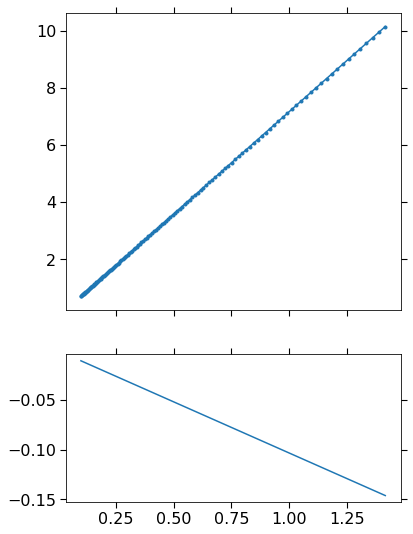

In [90]:
fig, axes = plt.subplots(2, 1, figsize=[6, 9], sharex=True, gridspec_kw={'height_ratios':[2,1]})
ax0, ax1 = axes
ax0.plot(krhoi_list, freq_arr.real, '.-')
ax1.plot(krhoi_list, freq_arr.imag)